# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [33]:
# Load pickled data
import pickle
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
validation_file="dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [34]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(len(set(y_test)),len(set(y_valid)),len(set(y_train)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

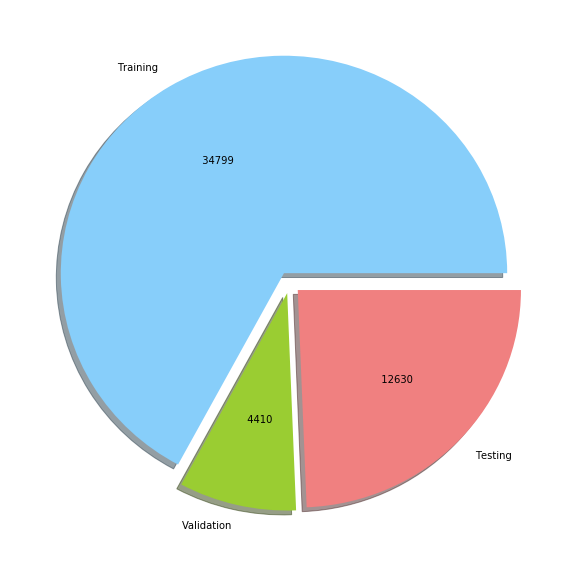

In [35]:
sets = ('Training', 'Validation', 'Testing')
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
y_pos = np.arange(len(sets))

sizes = [n_train,n_validation,n_test]
 
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '  {v:d}'.format(p=pct,v=val)
    return my_autopct
explode = (0.05, 0.05, 0.05)  # explode 1st slice
plt.figure(figsize=(10,10)) 
plt.pie(sizes,labels=sets,explode=explode, colors=colors,autopct=make_autopct(sizes), shadow=True) 
plt.savefig('writeup_images/1.jpg', bbox_inches='tight') 
plt.show()

In [36]:
count=[]
for label in range(n_classes):
    count.append(len(y_train[y_train==label]))
num_max=max(count)


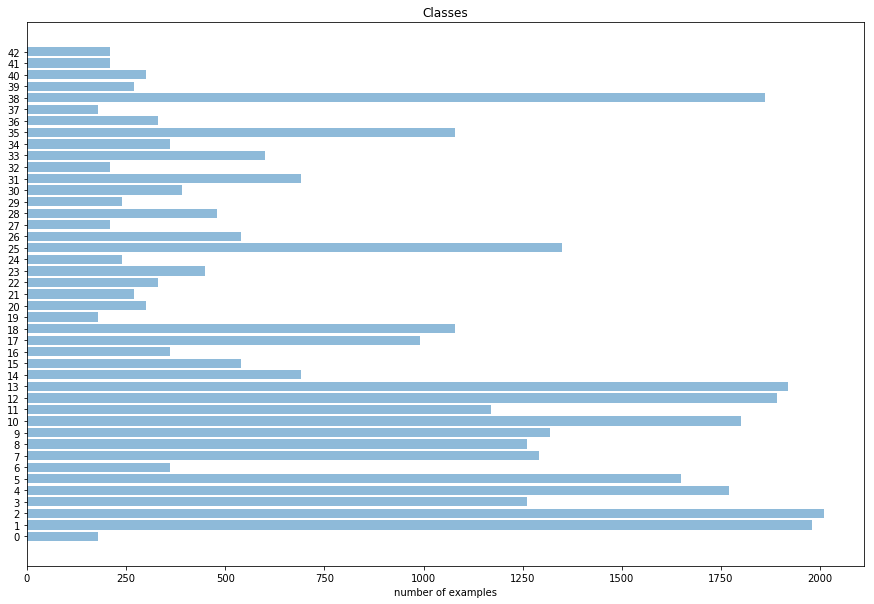

In [37]:
classes = (range(n_classes))
y_pos = np.arange(len(classes))
number = count
plt.figure(figsize=(15,10)) 
plt.barh(y_pos, number,align='center' , alpha=0.5)
plt.yticks(y_pos, classes )
plt.xlabel('number of examples')
plt.title('Classes')

plt.savefig('writeup_images/2.jpg', bbox_inches='tight') 
plt.show()


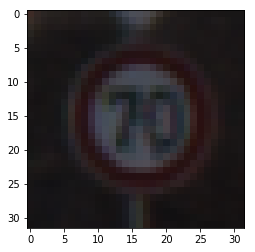

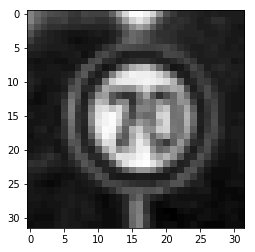

In [38]:
ex=7303
example=X_train[ex]
plt.imshow(example)
cv2.imwrite('writeup_images/4.jpg',cv2.cvtColor(example, cv2.COLOR_RGB2BGR))
plt.show()
plt.figure()

example_gray=cv2.cvtColor(example, cv2.COLOR_RGB2GRAY)
cv2.imwrite('writeup_images/5.jpg',example_gray)
plt.imshow(example_gray,cmap='gray')
plt.show()


## Data Augmentation

In [39]:
for label in range(n_classes):
 
    curr_class=X_train[y_train==label]
    repeated=int(num_max/len(curr_class))
    if repeated>1:
        repeated_data=np.uint8(curr_class+random.randint(-5,5))
        for i in range(repeated-2):
            repeated_data=np.concatenate((repeated_data,np.uint8(curr_class+random.randint(-5,5))))
        X_train=np.concatenate((X_train,repeated_data,np.uint8(curr_class[0:num_max-(len(curr_class)*(repeated))]+random.randint(-5,5))))
    else:
        X_train=np.concatenate((X_train,np.uint8(curr_class[0:num_max-(len(curr_class)*(repeated))]+random.randint(-5,5))))
    y_train=np.concatenate((y_train,np.array(label*np.ones(num_max-(len(curr_class)*(repeated))+(repeated-1)*len(curr_class)),dtype=int)))


In [40]:
rotated_data=[]
cols=image_shape[1]
rows=image_shape[1]
for image in X_train:
    M = cv2.getRotationMatrix2D((cols/2,rows/2),random.randint(-20,20),1.1)
    rotated_data.append(cv2.warpAffine(image,M,(cols,rows)))
X_rotated, y_rotated = shuffle(rotated_data, y_train)
X_train=np.concatenate((X_train,X_rotated[0:int(0.25*len(y_train))]))
y_train=np.concatenate((y_train,y_rotated[0:int(0.25*len(y_train))]))

In [41]:
count=[]
for label in range(n_classes):
    count.append(len(y_train[y_train==label]))
num_max=max(count)

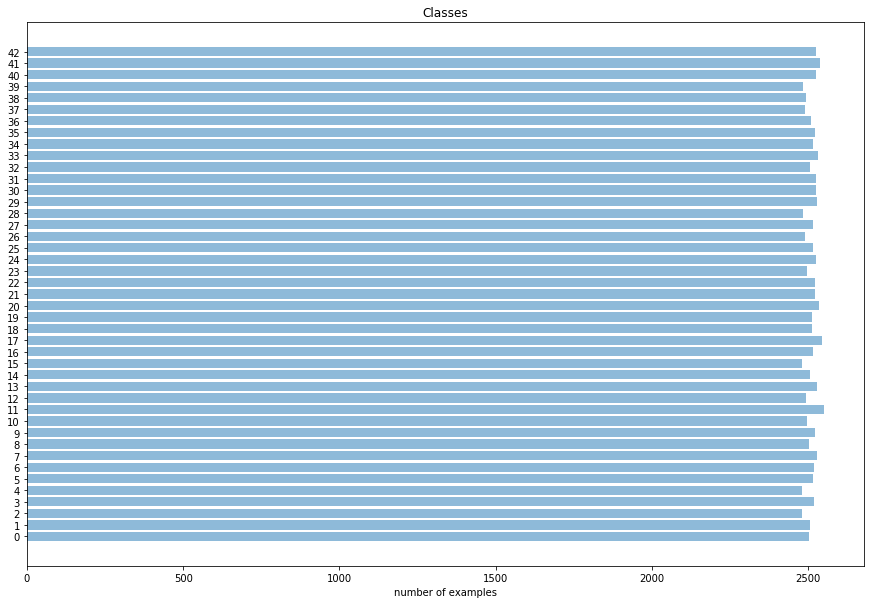

In [42]:
classes = (range(n_classes))
y_pos = np.arange(len(classes))
number = count
plt.figure(figsize=(15,10)) 
plt.barh(y_pos, number,align='center' , alpha=0.5)
plt.yticks(y_pos, classes )
plt.xlabel('number of examples')
plt.title('Classes')

plt.savefig('writeup_images/3.jpg', bbox_inches='tight') 
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.



X_train_norm=[]
X_valid_norm=[]
X_test_norm=[]
for i in range(len(X_train)):
    X_train_norm.append(cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY))
    X_train_norm[i]=np.expand_dims((np.array(X_train_norm[i], dtype=float)-128)/128,2)
for i in range(len(X_valid)):
    X_valid_norm.append(cv2.cvtColor(X_valid[i], cv2.COLOR_RGB2GRAY))
    X_valid_norm[i]=np.expand_dims((np.array(X_valid_norm[i], dtype=float)-128)/128,2)
X_valid=X_valid_norm
for i in range(len(X_test)):
    X_test_norm.append(cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY))
    X_test_norm[i]=np.expand_dims((np.array(X_test_norm[i], dtype=float)-128)/128,2)
X_test=X_test_norm
X_train, y_train = shuffle(X_train_norm, y_train)

### Model Architecture

In [12]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 128

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Added: Layer 3: Convolutional. Output = 10x10x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)
        
    # Added: Layer 4: Convolutional. Output = 10x10x16.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 16), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(16))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)
    
    
    # Added: Layer 5: Convolutional. Output = 10x10x16.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 16), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(16))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    
    # SOLUTION: Activation.
    conv5 = tf.nn.relu(conv5)
            
    # Added: Layer 6: Convolutional. Output = 10x10x16.
    conv6_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 16), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(16))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    
    # SOLUTION: Activation.
    conv6 = tf.nn.relu(conv6)
            
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv6 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv6)
    

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # apply DropOut to hidden layer
    fc1 = tf.nn.dropout(fc1, .6)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # apply DropOut to hidden layer
    fc2 = tf.nn.dropout(fc2, .6)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [15]:
#Features and Labels

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [16]:
#Training Pipeline

rate = 0.00122

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
#prediction
predicted_class=tf.argmax(logits, 1)

In [18]:
#Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
#Train the Model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.780
Training Accuracy = 0.824

EPOCH 2 ...
Validation Accuracy = 0.870
Training Accuracy = 0.900

EPOCH 3 ...
Validation Accuracy = 0.899
Training Accuracy = 0.931

EPOCH 4 ...
Validation Accuracy = 0.918
Training Accuracy = 0.946

EPOCH 5 ...
Validation Accuracy = 0.932
Training Accuracy = 0.957

EPOCH 6 ...
Validation Accuracy = 0.932
Training Accuracy = 0.959

EPOCH 7 ...
Validation Accuracy = 0.936
Training Accuracy = 0.967

EPOCH 8 ...
Validation Accuracy = 0.947
Training Accuracy = 0.969

EPOCH 9 ...
Validation Accuracy = 0.946
Training Accuracy = 0.972

EPOCH 10 ...
Validation Accuracy = 0.951
Training Accuracy = 0.970

EPOCH 11 ...
Validation Accuracy = 0.952
Training Accuracy = 0.974

EPOCH 12 ...
Validation Accuracy = 0.957
Training Accuracy = 0.977

EPOCH 13 ...
Validation Accuracy = 0.961
Training Accuracy = 0.980

EPOCH 14 ...
Validation Accuracy = 0.949
Training Accuracy = 0.975

EPOCH 15 ...
Validation Accuracy = 0.947
Tra

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.943


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os

images_path=os.listdir("new_images/")


In [22]:
import csv
classes_names = []
with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if line[1]=='SignName':
            continue
        classes_names.append(line[1])


### Predict the Sign Type for Each Image

In [29]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    images_classes=[]
    for image_path in images_path:
        image= mpimg.imread('new_images/'+image_path)
        image=cv2.resize(image,(32,32))
        image_gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image_norm=np.expand_dims((np.array(image_gray, dtype=float)-128)/128,2)
        image_norm=np.expand_dims((np.array(image_norm, dtype=float)),0)
        image_class=sess.run(predicted_class, feed_dict={x: image_norm})
        images_classes.append(image_class)

In [30]:
images_classes

[array([11], dtype=int64),
 array([12], dtype=int64),
 array([14], dtype=int64),
 array([17], dtype=int64),
 array([18], dtype=int64)]

### Analyze Performance

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
true_classes=[11,12,14,17,18]
pred=0
for index in range(5):
    if images_classes[index]==true_classes[index]:
        pred=pred+1
print('prediction_accuracy= '+str(pred*20)+'%' )

prediction_accuracy= 100%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

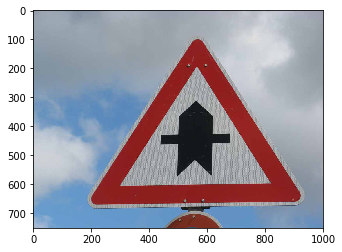

Right-of-way at the next intersection: 100.00000%
Double curve: 0.00000%
Beware of ice/snow: 0.00000%
Pedestrians: 0.00000%
Slippery road: 0.00000%


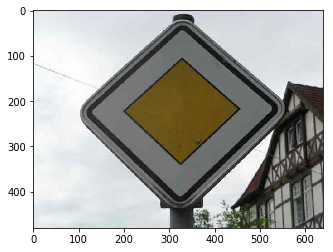

Priority road: 99.99920%
No vehicles: 0.00080%
Speed limit (100km/h): 0.00000%
Speed limit (80km/h): 0.00000%
Speed limit (120km/h): 0.00000%


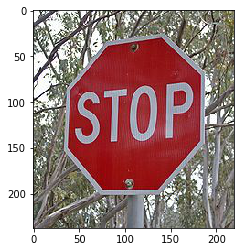

Stop: 99.99986%
Turn left ahead: 0.00015%
Dangerous curve to the left: 0.00000%
Keep right: 0.00000%
Right-of-way at the next intersection: 0.00000%


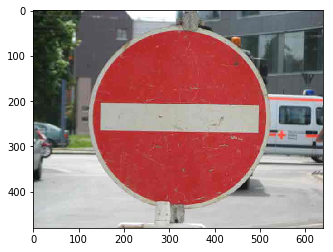

No entry: 100.00000%
Bumpy road: 0.00000%
Go straight or left: 0.00000%
Slippery road: 0.00000%
Turn left ahead: 0.00000%


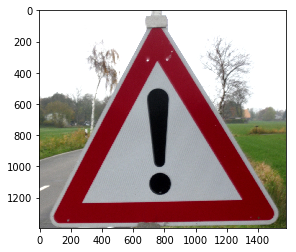

General caution: 100.00000%
Traffic signals: 0.00000%
Pedestrians: 0.00000%
Right-of-way at the next intersection: 0.00000%
End of no passing: 0.00000%


In [26]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for image_path in images_path:
        image= mpimg.imread('new_images/'+image_path)
        img=image
        image=cv2.resize(image,(32,32))
        image_gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image_norm=np.expand_dims((np.array(image_gray, dtype=float)-128)/128,2)
        image_norm=np.expand_dims((np.array(image_norm, dtype=float)),0)
        softmax=sess.run(tf.nn.softmax(logits), feed_dict={x: image_norm})
        plt.figure()
        plt.imshow(img)
        plt.show()
        image_percent,image_classes=sess.run(tf.nn.top_k(tf.constant(softmax), k=5))
        for index in range(5):
            print('%s: %.5f%%' % (classes_names[image_classes[0][index]], image_percent[0][index] * 100))

---
---


# **Traffic Sign Recognition**


---

**Build a Traffic Sign Recognition Project**

The goals of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.

---
### Writeup

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/s7s/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1.  Summary statistics of the traffic
signs data set:

* Number of training examples = 34799
* Number of validation examples = 4410
* Number of testing examples = 12630
* Image data shape = (32, 32, 3)
* Number of classes = 43

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a pie chart showing how the data divided into sets:

<img src="./writeup_images/1.jpg" alt="sets"  width="500"><br><br>

Also, Here is an exploratory visualization of the training set. It is a bar chart showing how many example in every class:

<img src="./writeup_images/2.jpg" alt="sets" width="600"><br><br>

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

##### 1- data balancing & augmentation
As a first step, I decided to balance the training data by make all the classes has the same number of examples.

And increase the data by augmentation the original data, and the augmentation done by increasing or decrising the pixel values with a random  between \[-5,5\].

then I augment the data again by rotationg them with random degree between\[-20,20\].

the data balancing step to prevent the model to lean toward the class with more examples.

And the augmentation step to make the model away from the overfitting and to increase the dataset.

 here is a bar chart showing how many example in every class after (data balancing & augmentation) step:

 <img src="./writeup_images/3.jpg" alt="sets" width="600"><br><br>



##### 2- Conversion to grayscale

Then, I converted the dataset to grayscale because there is no need for the colored features.

Here is an example of a traffic sign image before and after grayscaling.

<img src="./writeup_images/4.jpg" alt="example" width="400"><br><br>

<img src="./writeup_images/5.jpg" alt="example_grat" width="400"><br><br>

##### 3- Normalization

I normalized the image data to make its mean =0 and its standard deviation=1 because that make the convergence process.

##### 4- Shuffling data

I shuffled the data to avoid the problems of ordering the data.


#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					|
|:---------------------:|:---------------------------------------------:|
| Input         		| 32x32x1 grayscale image   							|
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				|
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 10x10x16 	|
| RELU					|												|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 10x10x16 	|
| RELU					|												|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 10x10x16 	|
| RELU					|												|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 10x10x16 	|
| RELU					|												|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 10x10x16 	|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16 				|
| Flatten		| outputs  400   									|
| Fully connected		| outputs 120        									|
| RELU					|												|
| Dropout					|	keep_rate 0.6 											|
| Fully connected		| outputs 84        									|
| RELU					|												|
| Dropout					|	keep_rate 0.6 											|
| Fully connected		| outputs 43        									|
| Softmax				|        									|


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

* the optimizer: My model was trained via Adam optimizer. I did not experiment with other optimizers yet, because it gave me good results.

* the batch size: I choose it small as I don't have an Nvidia GPU and I train the model in my labtop.

* the number of epochs: I increased it until I found the accuracies became stable without big diffrence between the validation and training accuracies(no overfitting) and that after I tuned the dropout keep-rate.

* the learning rate: I began with the 0.001 , I noticed that the accuracy increases slowly ,So I tried to increase it bit by bit then I chose the value just before the accuracy began to diverge.
* the dropout keep-rate: firstly I used the keep-rate =1 then I started to decrease it when I found the model overfit.

###### parameters final values:

* the optimizer: Adam optimizer
* the batch size: 128
* the number of epochs: 60
* the learning rate: 0.00122
* the dropout keep-rate: 0.6


#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* training set accuracy :  98.9%
* validation set accuracy :  96.8%
* test set accuracy :  94.3%

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?

I started with a LeNet architecture  because it used before to classify letters and gave good results.

* What were some problems with the initial architecture?

The accuracy was low.

* How was the architecture adjusted and why was it adjusted?

Because of a low accuracy I started to add a convolutional layers.
but that drived the model to overfit ,So I added dropout layers to handle the overfit.

* Which parameters were tuned? How were they adjusted and why?

Number of added convolutional layers: I added one by one until the accuracy stopped increasing.
Dropout keep-rate: firstly I used the keep-rate =1 then I started to decrease it when I found the model overfit.

* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?

Convolutional layers worked well because it is image classification problem and we need the convolution to apply the masks on the images.

Dropout helped to handle the overfit problem in the model.


### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

|<img src="./writeup_images/6.jpg" alt="example" width="200">|<img src="./writeup_images/7.jpg" alt="example" width="200">|<img src="./writeup_images/8.jpg" alt="example" width="200">|<img src="./writeup_images/9.jpg" alt="example" width="200">|<img src="./writeup_images/10.jpg" alt="example" width="200">|

The first image might be difficult to classify because it's not in the center.

The second image might be difficult to classify because of the house in the background.

The third image might be difficult to classify because of its photographing prespective and the trees in background.

The forth and the fifth images might be difficult to classify because of the background also.


#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| Right-of-way at the next intersection     		| Right-of-way at the next intersection sign   									|
| Priority road | Priority road 										|
| Stop					| Stop											|
| No entry 		| No entry					 				|
| General caution			| General caution      							|


The model was able to correctly guess 5 of the 5 traffic signs, which gives an accuracy of 100%. This compares favorably to the accuracy on the test set of 94.3%

####3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

For the first image, the model is sure that this is a (Right-of-way at the next intersection) sign (probability of 100%), and the image does contain a (Right-of-way at the next intersection) sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 100.00000%         			| Right-of-way at the next intersection|
| 0.00000%    				|Double curve 				|
| 0.00000%  			|Beware of ice/snow				|
| .0.00000%      			| Pedestrians				 				|
| 0.00000%  		    | Slippery road     							|

For the second image, the model is sure that this is a (Priority road) sign (probability of 99.99920% ), and the image does contain a (Priority road) sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
|  99.99920%        			| Priority road|
|  0.00080%    				|No vehicles				|
| 0.00000%				|Speed limit (100km/h)		|
| 0.00000%	      			|Speed limit (80km/h)	 				|
| 0.00000%				    | Speed limit (120km/h)						|


For the third image, the model is sure that this is a (Stop) sign (probability of 99.99986% ), and the image does contain a (Stop) sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 99.99986%      			| Stop  									|
| 0.00015%  				| Turn left ahead 										|
| 0.00000%		|Dangerous curve to the left			|
| 0.00000%      			| Keep right			|
| 0.00000%		    | Right-of-way at the next intersection|

For the forth image, the model is sure that this is a (No entry ) sign (probability of 100%), and the image does contain a (No entry ) sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 100.00000%      			| No entry  									|
| 0.00000%	    				|Bumpy road									|
| 0.00000%					| Go straight or left						|
| 0.00000%	      			|Slippery road		 				|
| 0.00000%				    | Turn left ahead  							|

For the fifth image, the model is sure that this is a (General caution ) sign (probability of 100%), and the image does contain a (General caution) sign. The top five soft max probabilities were

| Probability         	|     Prediction
|:---------------------:|:---------------------------------------------:|
| 100.00000%     			|General caution  									|
| 0.00000%				|Traffic signals							|
| 0.00000%			| Pedestrians			|
| 0.00000%     			|Right-of-way at the next intersection	 				|
| 0.00000%	    |End of no passing|
